In [1]:
import pandas as pd
import numpy as np
import math
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("seaborn")
sns.set(style="white")

In [9]:
def set_up_senoidal(t_time, count, cycles, width):
    return [width*math.sin(cycles*2*math.pi*ti/count) for ti in t_time]
    
N = 256
tiempo = np.arange(N)

df_ej = pd.DataFrame({
    'tiempo': tiempo,
    'seno2': set_up_senoidal(t_time=tiempo, count=N, cycles=2, width=1),
    'seno10': set_up_senoidal(t_time=tiempo, count=N, cycles=10, width=1),
    'seno20': set_up_senoidal(t_time=tiempo, count=N, cycles=20, width=2),
    'niveldc': [1] * N,
    'nivelruido': np.random.normal(0, 0.5, N)
})

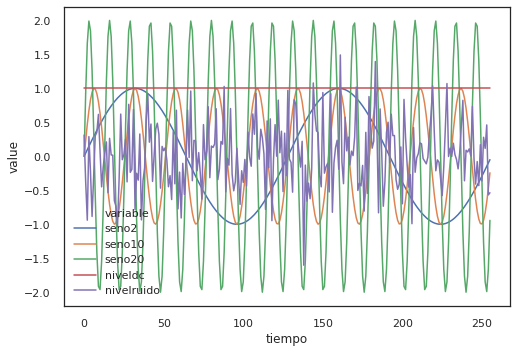

In [10]:
sns.lineplot(x="tiempo", y="value", hue='variable', data=pd.melt(df_ej, 'tiempo'))

In [30]:
df_ej['seno21020dcruido'] = df_ej.seno2 + df_ej.seno10 + df_ej.seno20 + df_ej.niveldc + df_ej.nivelruido
df_fft = pd.DataFrame({
    'tiempo': tiempo,
    'seno21020dcruido': fft(df_ej.seno21020dcruido.values),
    'seno21020dcruido_mod': np.abs(fft(df_ej.seno21020dcruido.values)),
})

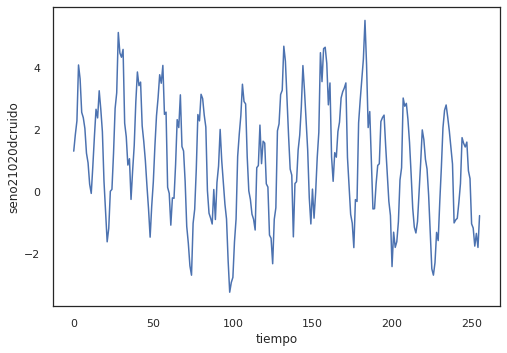

In [31]:
sns.lineplot(x="tiempo", y="seno21020dcruido", data=df_ej)

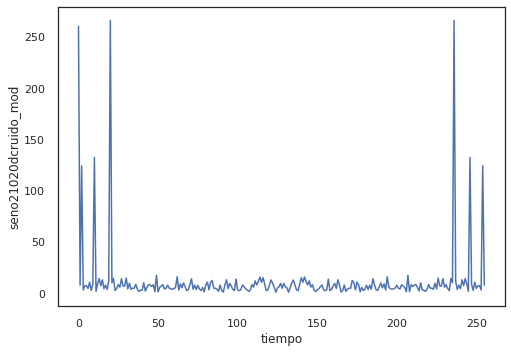

In [32]:
sns.lineplot(x="tiempo", y="seno21020dcruido_mod", data=df_fft)

In [33]:
df_filtroDF = pd.DataFrame({
    'tiempo': tiempo,
    'filtroDF': [0] * 15 + [1] * (N-30) + [0] * 15
})

In [40]:
df_filtroDF['seno21020dcruidoDF'] = df_filtroDF.filtroDF * df_fft.seno21020dcruido
df_filtroDF['seno21020dcruidoDF_mod'] = np.abs(df_filtroDF.seno21020dcruidoDF.values)

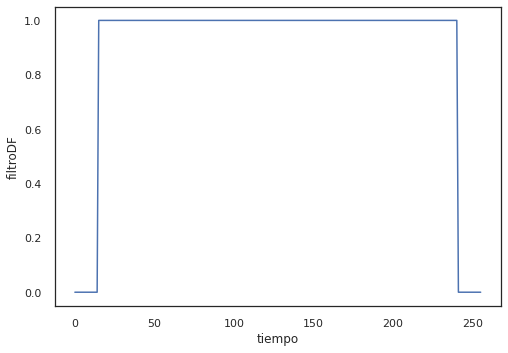

In [41]:
sns.lineplot(x="tiempo", y="filtroDF", data=df_filtroDF) 

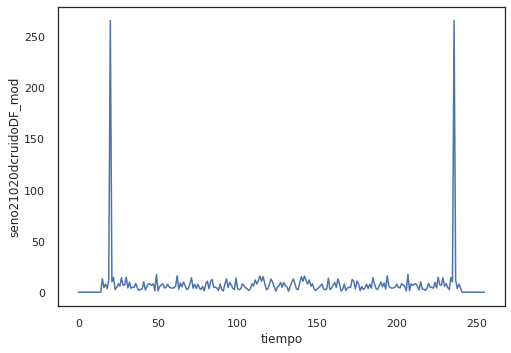

In [42]:
sns.lineplot(x="tiempo", y="seno21020dcruidoDF_mod", data=df_filtroDF) 

In [50]:
df_inv = pd.DataFrame({
    'tiempo': tiempo,
    'seno20': df_ej.seno20,
    'seno21020dcruidoDF_inv': (ifft(df_filtroDF.seno21020dcruidoDF.values)).real
})

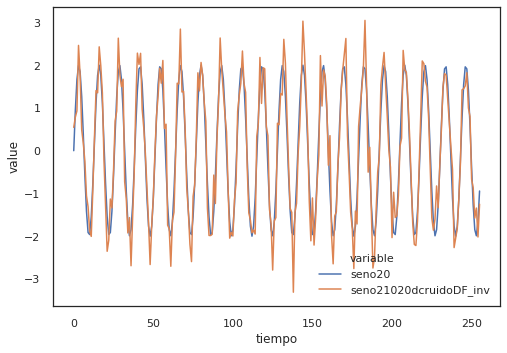

In [52]:
sns.lineplot(x="tiempo", y="value", hue='variable', data=pd.melt(df_inv, 'tiempo'))